## 01. Normalized prices

Absolute prices does not work for comparing different financial instruments because they are in different scale

In [ ]:
!pip install yfinance

In [4]:
import pandas as pd 
import yfinance as yf 

In [41]:
symbols = ['VOO','PDBC','SPY','VTWO','ESGU','QQQ','VTI','SCHD','VNQ']

In [42]:
from datetime import datetime, timedelta
now = datetime.utcnow()
now

datetime.datetime(2021, 12, 29, 7, 3, 27, 246579)

In [54]:
two_years_before = now - timedelta(weeks= 52 * 3)
two_years_before

datetime.datetime(2019, 1, 2, 7, 3, 27, 246579)

In [55]:
str(now).split()[0]

'2021-12-29'

In [56]:
df = yf.download(symbols, start = str(two_years_before).split()[0], end = str(now).split()[0])
df.head()

[*********************100%***********************]  9 of 9 completed


Adj Close                         ...   Volume                 
                 ESGU       PDBC         QQQ  ...      VOO      VTI    VTWO
Date                                          ...                          
2019-01-02  52.493992   9.692384  152.012146  ...  4891300  5093200  471800
2019-01-03  51.275879   9.762897  147.045807  ...  3329600  5252900  372800
2019-01-04  53.146214   9.903924  153.337112  ...  5100100  4776900  312800
2019-01-07  53.491505   9.980848  155.162704  ...  3706000  4485100  281000
2019-01-08  54.095768  10.064182  156.566223  ...  3546600  3949400  193200

[5 rows x 54 columns]

### 01.01. Base value (100)

In [57]:
close = df.Close.copy()  
close.describe()

,ESGU,PDBC,QQQ,SCHD,SPY,VNQ,VOO,VTI,VTWO
count,754.000000,754.000000,754.000000,754.000000,754.000000,754.000000,754.000000,754.000000,754.000000
mean,78.065728,16.255995,262.664828,60.943647,345.626751,90.181578,317.707427,177.446976,70.863176
std,15.469806,2.628538,73.712944,10.426965,63.260295,10.607289,58.265525,33.854898,14.525194
min,49.980000,11.220000,149.820007,39.500000,222.949997,56.910000,204.270004,111.910004,40.029999
25%,64.599997,14.235000,191.477501,52.832500,292.910004,83.160004,269.022507,149.214996,60.624999
50%,73.510002,16.095000,249.665001,57.000000,326.654999,89.044998,300.134995,166.114998,63.799999
75%,91.245001,17.387499,328.769989,73.485001,397.047508,95.740000,365.044991,208.837505,88.390001
max,108.459999,22.709999,403.989990,80.699997,477.260010,114.419998,438.809998,242.960007,98.010002


In [58]:
first_row = close.iloc[0]
first_row

ESGU     54.730000
PDBC     15.120000
QQQ     154.880005
SCHD     46.970001
SPY     250.179993
VNQ      72.949997
VOO     229.990005
VTI     127.730003
VTWO     54.084999
Name: 2019-01-02 00:00:00, dtype: float64

In [59]:
norm = close.div(first_row).mul(100) 
norm

,ESGU,PDBC,QQQ,SCHD,SPY,VNQ,VOO,VTI,VTWO
Date,,,,,,,,,
2019-01-02,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
2019-01-03,97.679517,100.727511,96.732956,98.041299,97.613724,100.699112,97.612937,97.682607,98.104839
2019-01-04,101.242464,102.182539,100.871637,100.745153,100.883367,101.878002,100.834818,100.915987,101.738010
2019-01-07,101.900239,102.976189,102.072567,101.426438,101.678796,102.878693,101.591368,101.933761,103.651664
2019-01-08,103.051347,103.835978,102.995867,102.384498,102.634102,105.003429,102.578370,102.982846,105.232508
...,...,...,...,...,...,...,...,...,...
2021-12-21,192.380782,90.939154,251.297765,167.575042,185.090739,153.694321,185.090653,185.297100,162.632894
2021-12-22,194.244470,91.997354,254.358213,168.511815,186.941409,155.270735,186.960294,187.129099,164.278451
2021-12-23,195.450397,92.460315,256.275827,169.469867,188.104573,155.106246,188.112529,188.420881,165.535731


### 01.02 Visualize Normalized Prices

In [60]:
import matplotlib.pyplot as plt 
plt.style.use('seaborn')

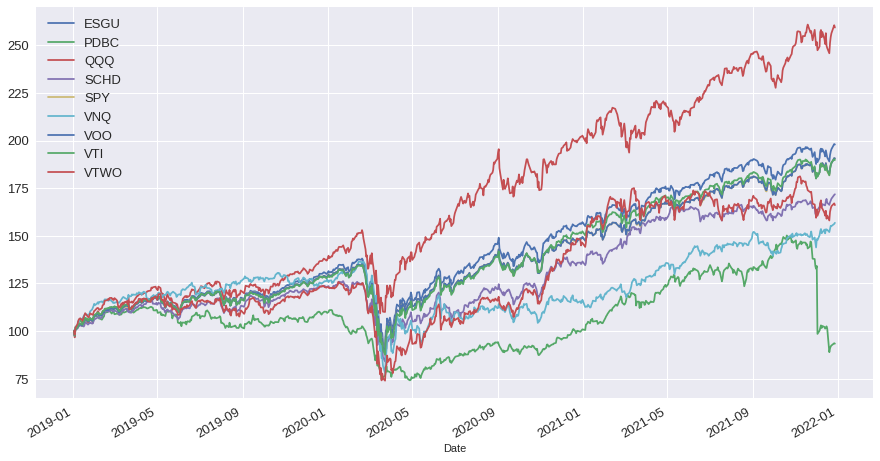

In [61]:
norm.dropna().plot(figsize = (15,8), fontsize = 13)
plt.legend(fontsize = 13)
plt.show()

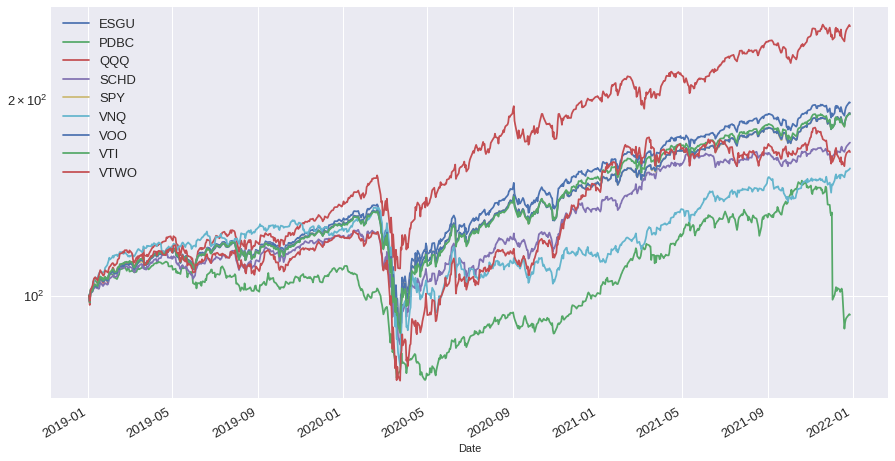

In [62]:
#log scale 
norm.dropna().plot(figsize = (15,8), fontsize = 13,logy = True)
plt.legend(fontsize = 13)
plt.show()

## 02. Returns

Normalized prices help to compare financial instruments... but they are limited when it comes to measuring/comparing performance in more detail

The relative price changes **(returns)** are similar to interest rate

In [65]:
import pandas as pd
pd.options.display.float_format = '{:.4f}'.format 

In [70]:
voo = close.VOO.dropna().to_frame().copy()
voo.rename(columns = {'VOO':'price'},inplace = True)
voo.head()

,price
Date,
2019-01-02,229.9900
2019-01-03,224.5000
2019-01-04,231.9100
2019-01-07,233.6500
2019-01-08,235.9200


### 02.01. Alternative 1

$Return_n = \frac{Price_n}{Price_{n-1}} - 1$

In [71]:
voo_shifted = voo.shift(periods = 1)
voo['price_lag1'] = voo_shifted
voo.head()

,price,price_lag1
Date,,
2019-01-02,229.9900,nan
2019-01-03,224.5000,229.9900
2019-01-04,231.9100,224.5000
2019-01-07,233.6500,231.9100
2019-01-08,235.9200,233.6500


In [72]:
voo.price.div(voo.price_lag1) -1 

Date
2019-01-02       nan
2019-01-03   -0.0239
2019-01-04    0.0330
2019-01-07    0.0075
2019-01-08    0.0097
               ...  
2021-12-21    0.0140
2021-12-22    0.0101
2021-12-23    0.0062
2021-12-27    0.0143
2021-12-28   -0.0008
Length: 754, dtype: float64

### 02.02. Alternative 2

In [73]:

voo['returns'] = voo.price.pct_change(periods = 1)
voo.head()

,price,price_lag1,returns
Date,,,
2019-01-02,229.9900,nan,nan
2019-01-03,224.5000,229.9900,-0.0239
2019-01-04,231.9100,224.5000,0.0330
2019-01-07,233.6500,231.9100,0.0075
2019-01-08,235.9200,233.6500,0.0097


### 02.03. Normalized prices using returns

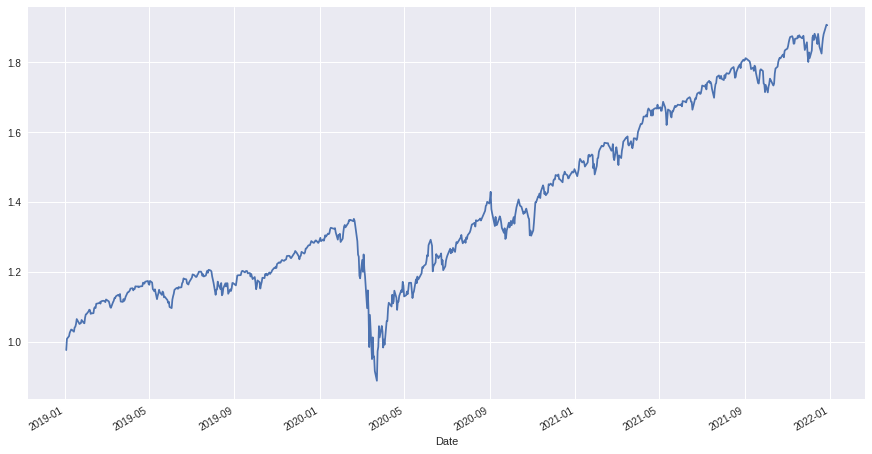

In [74]:
(1 + voo.returns).cumprod().plot(figsize = (15,8))
plt.show()